In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('bbc_news_dataset.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [14]:
df.shape

(1490, 3)

In [15]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [16]:
X=df['Text']
y=df['Category']

In [17]:
category_names=df['Category'].unique()
print(category_names)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [18]:
value_counts=df['Category'].value_counts()
print(value_counts)

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


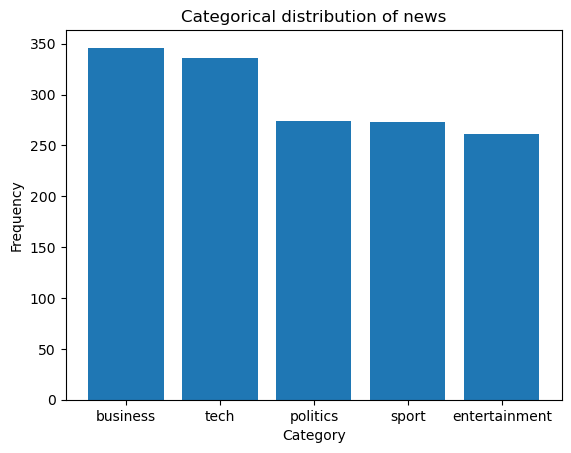

In [19]:
plt.plot(figsize=(6,4))
plt.bar(x=category_names,height=value_counts)
plt.title("Categorical distribution of news")
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.savefig("news_classification.png")
plt.show()

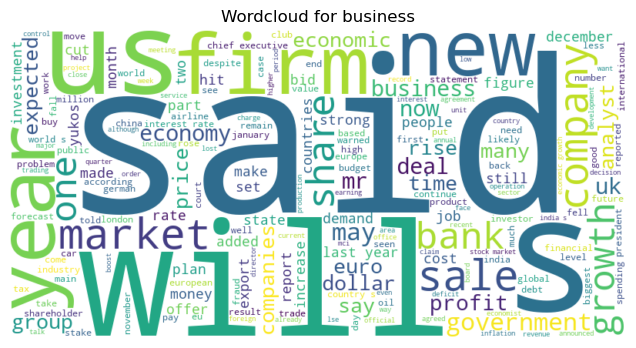

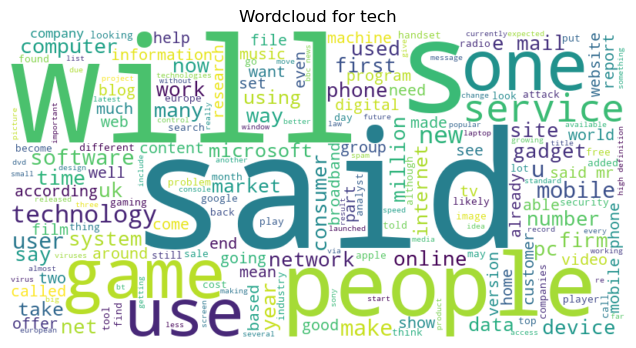

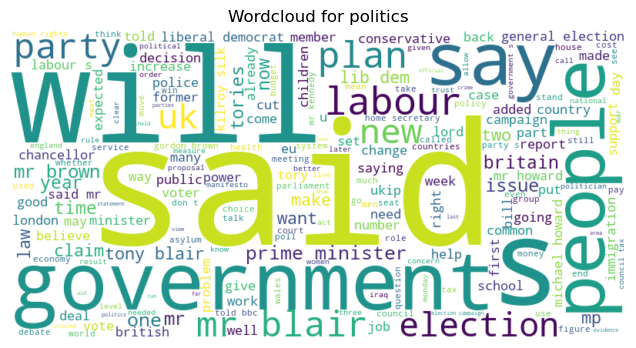

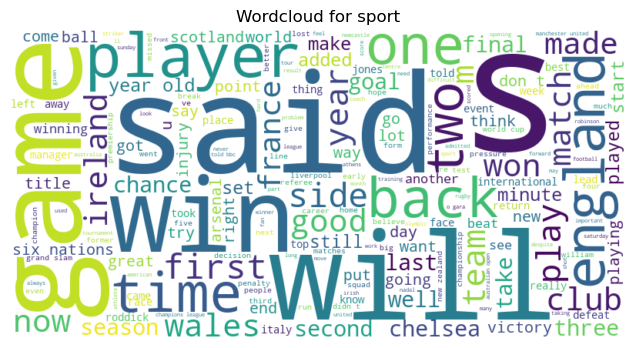

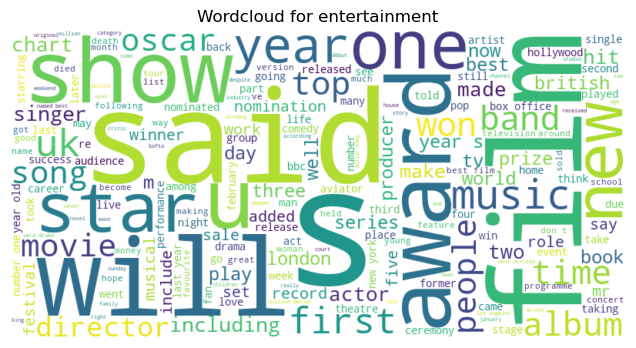

In [20]:
from wordcloud import WordCloud
for category in category_names:
    text=''.join(df[df['Category']==category]['Text'].values)
    wc=WordCloud(width=800,height=400,background_color='white').generate(text=text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc,interpolation='bilinear')
    plt.title(f"Wordcloud for {category}")
    plt.axis('off')
    plt.savefig(f"Wordcloud for {category}.png")
    plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [23]:
model=make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9563758389261745


In [24]:
cm=confusion_matrix(y_test,y_pred)
cm_plot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=category_names)

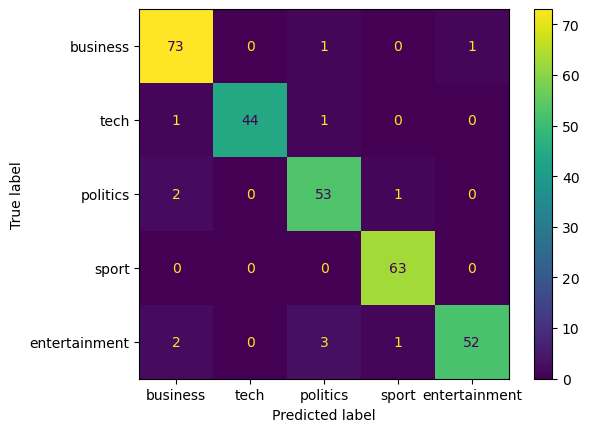

In [25]:
cm_plot.plot()
plt.savefig("Confusion matrix for news dataset")

In [ ]:



predictions = model.predict(texts)
for text, prediction in zip(texts,predictions):
    print(f"Text: {text[:20]}... | predicted {prediction}" )
    

SyntaxError: invalid syntax (4244526186.py, line 3)